In [175]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from tqdm import tqdm
from sklearn import preprocessing

## CITE seq

In [141]:
# Read the healthy citeseq dataset 
healthy_codex_cite = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/citeseq/cellfeaturization_results_healthy_processed.h5ad")
# Read scRNA-seq
scrnaseq_cite = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/citeseq/CITEseq_protein_processed.h5ad")

**Check dataset**

In [142]:
scaler = preprocessing.StandardScaler()
healthy_codex_cite.X = scaler.fit_transform(healthy_codex_cite.X)

healthy_codex_cite.X

array([[-1.0874388 , -3.046413  , -0.92486566, ..., -1.2126375 ,
        -2.4383569 , -0.8761074 ],
       [-0.8963065 , -2.01362   , -0.37918943, ..., -0.5467276 ,
        -1.0255988 , -0.44730237],
       [-0.8613775 , -1.8419701 , -0.8103915 , ..., -0.24657801,
        -1.3101273 ,  0.04025251],
       ...,
       [-0.9048315 , -1.7465267 , -0.7572166 , ..., -1.189934  ,
        -1.766531  , -0.45462698],
       [-0.8749196 , -1.9343331 , -0.72375256, ..., -1.2660115 ,
        -2.1281033 , -0.2599198 ],
       [-1.0275111 , -2.3109984 , -0.94315714, ..., -1.3219851 ,
        -2.2932289 , -0.6329917 ]], dtype=float32)

In [143]:
scrnaseq_cite.X

array([[-6.21575432e-01, -8.34365421e-01,  1.27149295e+00, ...,
        -3.17212674e-01, -2.31178472e-01, -6.49883562e-02],
       [-4.92765574e-01, -8.34365421e-01, -5.14401470e-01, ...,
         2.60087516e-01, -1.19941983e+00, -2.00941898e+00],
       [-9.14865630e-02, -8.34365421e-01, -5.14401470e-01, ...,
        -6.28270863e-01,  4.73344164e-01, -3.18317974e-01],
       ...,
       [-6.40795396e-02,  3.08671924e-01, -5.14401470e-01, ...,
         1.65393945e-01,  2.99911641e+00,  3.13626944e+00],
       [-4.61136921e-01,  4.25799178e-01, -5.14401470e-01, ...,
         9.50055511e-01,  1.24914759e+00, -1.02857515e+00],
       [-1.16263844e+00, -8.34365421e-01, -5.14401470e-01, ...,
        -5.02578813e-01, -8.41645233e-02,  2.44502402e-03]])

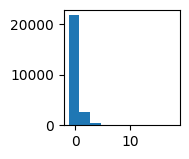

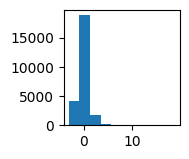

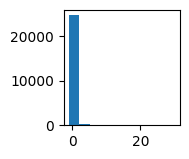

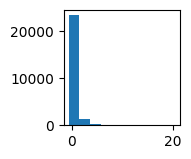

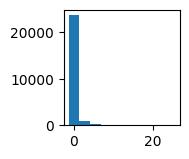

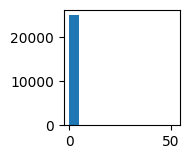

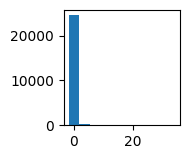

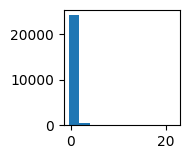

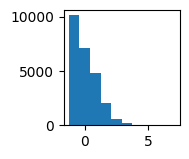

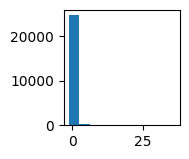

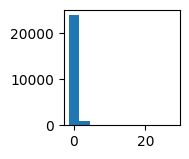

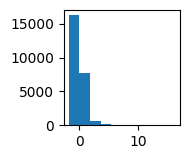

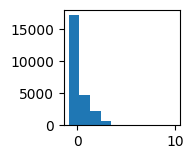

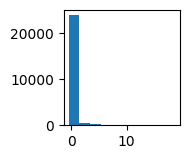

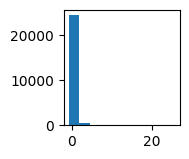

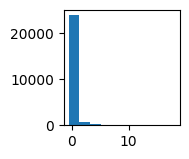

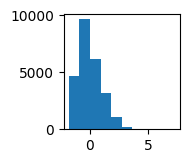

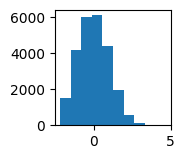

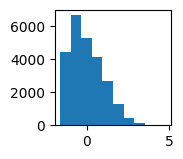

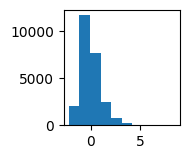

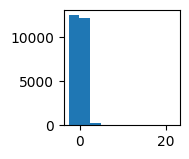

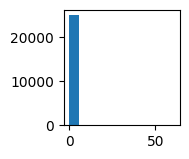

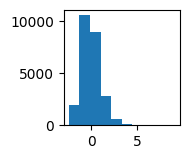

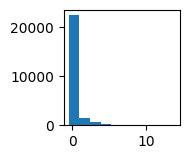

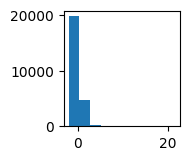

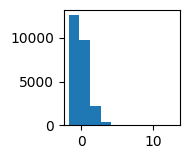

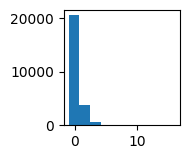

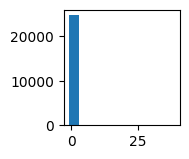

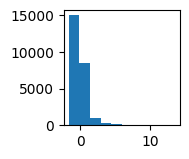

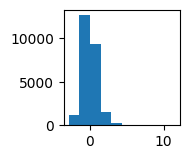

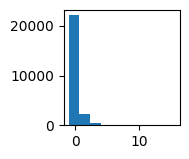

In [144]:
for i in range(healthy_codex_cite.X.shape[1]):
    plt.figure(figsize=(1.5, 1.5))
    plt.hist(healthy_codex_cite.X[:, i])
    plt.show()

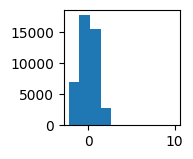

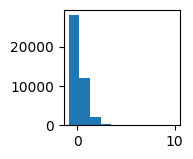

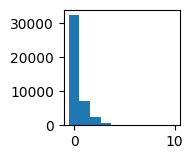

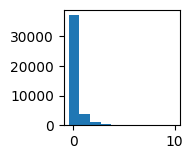

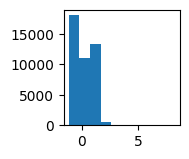

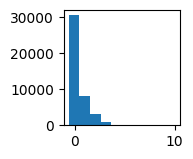

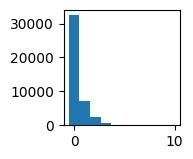

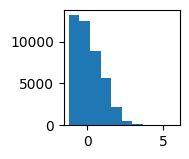

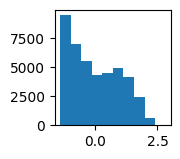

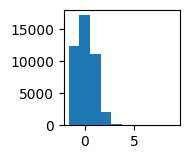

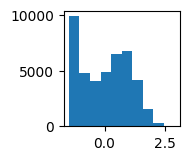

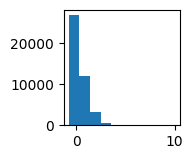

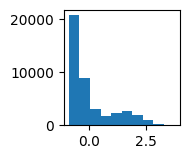

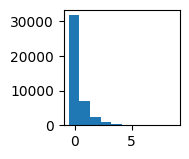

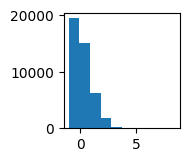

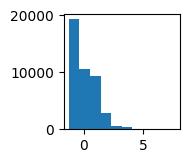

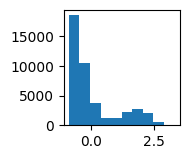

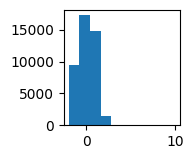

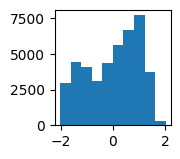

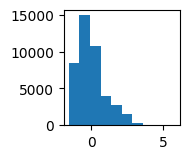

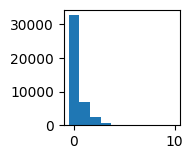

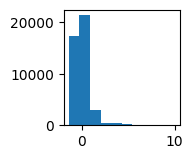

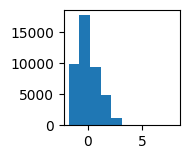

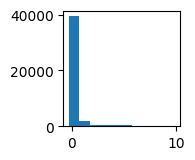

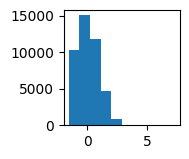

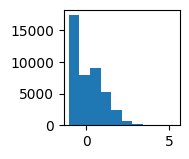

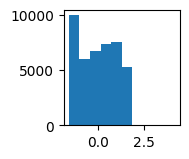

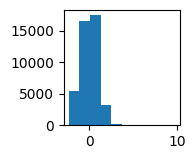

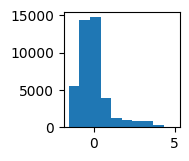

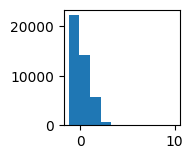

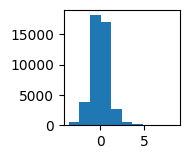

In [145]:
for i in range(scrnaseq_cite.X.shape[1]):
    plt.figure(figsize=(1.5, 1.5))
    plt.hist(scrnaseq_cite.X[:, i])
    plt.show()

#### Cosine distance

In [160]:
pairwise_distances = {"cl_id": [],
                      "ct_id": [], 
                      "distance": []
                     }

for cl_id in np.unique(healthy_codex_cite.obs.shared_leiden_cluster_id):
    X_cl_codex = healthy_codex_cite.X[healthy_codex_cite.obs.shared_leiden_cluster_id==cl_id]
    for ct_id in np.unique(scrnaseq_cite.obs.annotation_figure_1):
        X_ct_rna = scrnaseq_cite.X[scrnaseq_cite.obs.annotation_figure_1==ct_id]
        dist_cl_ct = np.mean(cdist(X_cl_codex, X_ct_rna, 'correlation'))
        pairwise_distances["cl_id"].append(cl_id)
        pairwise_distances["ct_id"].append(ct_id)
        pairwise_distances["distance"].append(dist_cl_ct)

In [161]:
pairwise_distances = pd.DataFrame(pairwise_distances)

Cluster 0


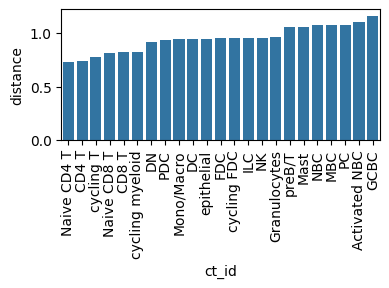

Cluster 1


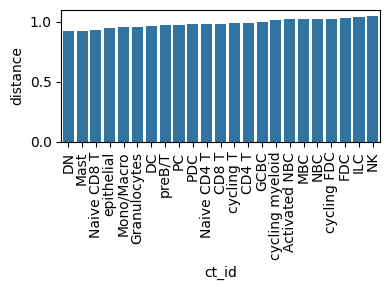

Cluster 10


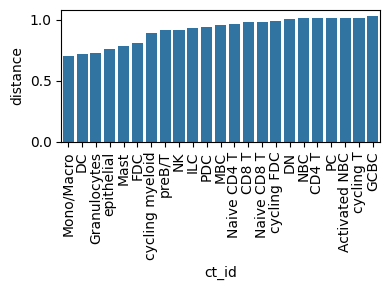

Cluster 11


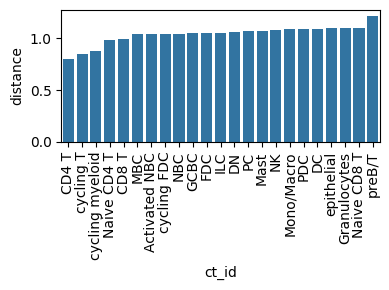

Cluster 12


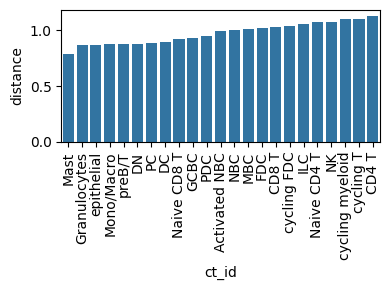

Cluster 13


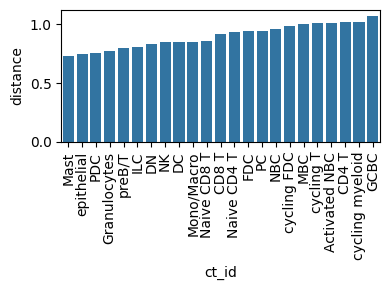

Cluster 14


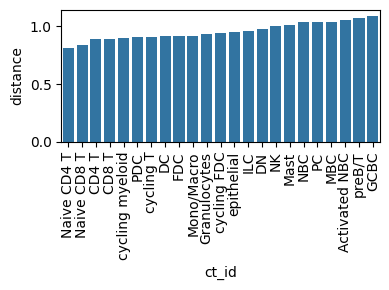

Cluster 2


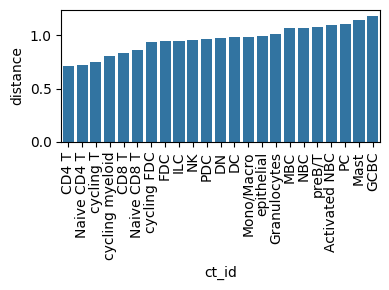

Cluster 3


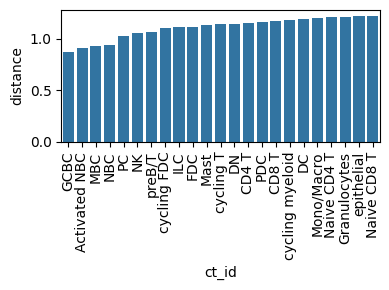

Cluster 4


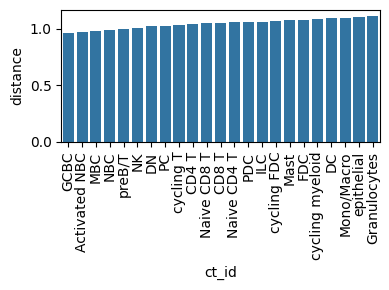

Cluster 5


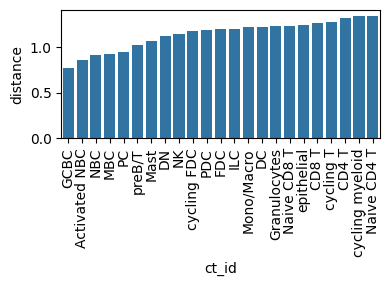

Cluster 6


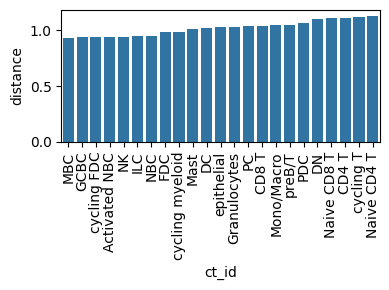

Cluster 7


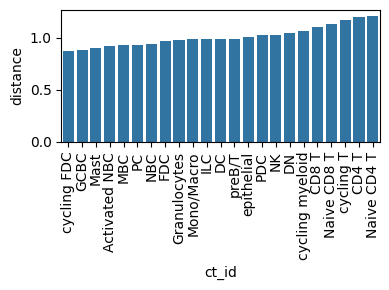

Cluster 8


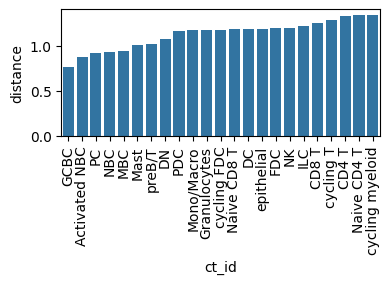

Cluster 9


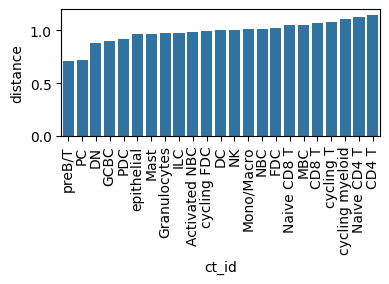

In [162]:
for cl in np.unique(pairwise_distances.cl_id):
    print(f"Cluster {cl}")
    pairwise_distances_cl = pairwise_distances[pairwise_distances.cl_id == cl]

    # Sort ct_id by distance
    ordered_ct_ids = pairwise_distances_cl.sort_values("distance")["ct_id"]

    plt.figure(figsize=(4, 3))
    sns.barplot(data=pairwise_distances_cl, x="ct_id", y="distance", order=ordered_ct_ids)

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## Compare the cell type distribution CITE and gene expression

In [163]:
scrnaseq = sc.read_h5ad("/lustre/groups/ml01/workspace/alessandro.palma/scportrait/data/scrnaseq/sce_converted_processed_discovery.h5ad")

In [164]:
scrnaseq_cite.shape

(42929, 31)

In [165]:
scrnaseq.shape

(263286, 55)

In [166]:
unique_cite = list(np.unique(scrnaseq_cite.obs.annotation_figure_1, return_counts=True))
unique_cite[1] = unique_cite[1] / np.sum(unique_cite[1])

In [167]:
unique_rna = list(np.unique(scrnaseq.obs.annotation_figure_1, return_counts=True))
unique_rna[1] = unique_rna[1] / np.sum(unique_rna[1])

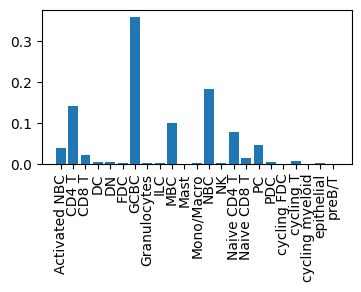

In [168]:
plt.figure(figsize=(4, 2))
plt.bar(x=unique_cite[0], height=unique_cite[1])
plt.xticks(rotation=90)
plt.show()

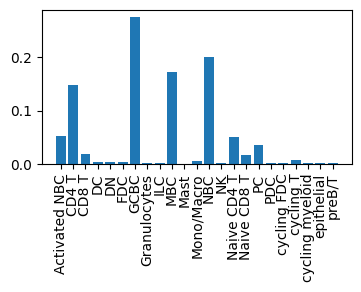

In [169]:
plt.figure(figsize=(4, 2))
plt.bar(x=unique_rna[0], height=unique_rna[1])
plt.xticks(rotation=90)
plt.show()

In [170]:
unique_cite[1]

array([3.70844883e-02, 1.41442847e-01, 2.11046146e-02, 4.58897249e-03,
       3.14472734e-03, 8.15299681e-04, 3.58359151e-01, 3.96002702e-04,
       1.39765660e-03, 9.86745557e-02, 4.65885532e-05, 2.18966200e-03,
       1.81625475e-01, 2.02660206e-03, 7.80358266e-02, 1.28118521e-02,
       4.60061963e-02, 3.21461017e-03, 6.98828298e-05, 6.40592606e-03,
       6.98828298e-05, 4.65885532e-04, 2.32942766e-05])

In [171]:
unique_rna[1]

array([5.20422658e-02, 1.47858223e-01, 1.83640604e-02, 3.76776585e-03,
       2.63591684e-03, 3.72218804e-03, 2.76216738e-01, 5.96309716e-04,
       1.24199540e-03, 1.72417067e-01, 1.51926042e-04, 5.13889838e-03,
       2.00660119e-01, 1.28377506e-03, 5.08116649e-02, 1.68296073e-02,
       3.44682209e-02, 1.83070881e-03, 8.46987686e-04, 7.06456097e-03,
       3.68420653e-04, 1.37113253e-03, 3.11448387e-04])

## Visualize codex data 

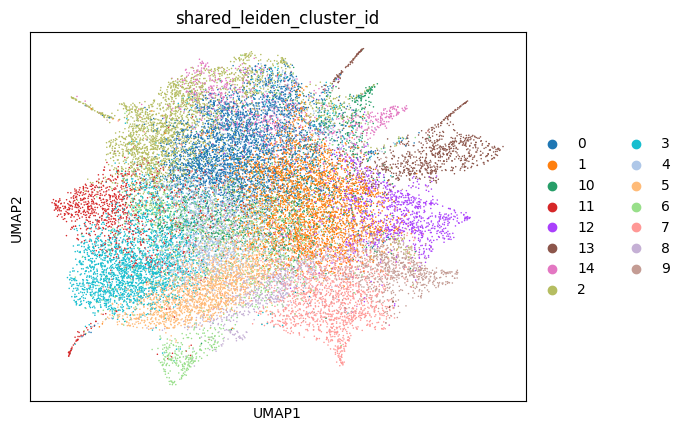

In [172]:
sc.pp.neighbors(healthy_codex_cite)
sc.tl.umap(healthy_codex_cite)
sc.pl.umap(healthy_codex_cite, color="shared_leiden_cluster_id")

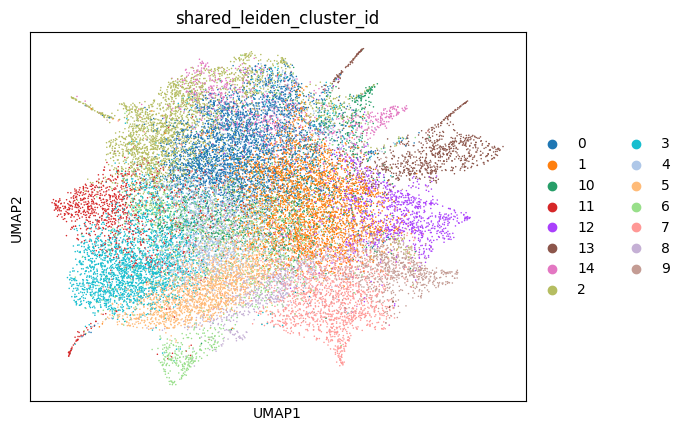

In [174]:
sc.pp.neighbors(healthy_codex_cite)
sc.tl.umap(healthy_codex_cite)
sc.pl.umap(healthy_codex_cite, color="shared_leiden_cluster_id")